# test_paraboloid.ipynb

### Install

In [ ]:
pip install git+https://github.com/grmacchio/dynml.git

### Imports, Random Seeds, and Data Type Settings

In [2]:
from random import seed
from math import floor

from matplotlib.pyplot import figure, subplots, show
from torch import float64, linspace, meshgrid, set_default_dtype, stack
from torch.linalg import norm
from torch.random import manual_seed as torch_manual_seed
from torch.cuda.random import manual_seed as cuda_manual_seed

from dynml.dyn.cont.ode.firstorder.discretize import gen_approx_discrete_sys
from dynml.examples.paraboloid import Paraboloid
from dynml.dyn.discrete.numsolve import gen_num_trajs

In [3]:
seed(0)                                                                         # set the random seed
torch_manual_seed(0)                                                            # set the torch random seed
cuda_manual_seed(0)                                                             # set the cuda random seed

In [4]:
set_default_dtype(float64)                                                      # set the default data type

### Generate State Space Trajectories

In [5]:
first_order_sys = Paraboloid()

dt = 0.01                                                                       # set the time step
discretization_method = 'rk4'                                                   # set the discretization method
discrete_sys = gen_approx_discrete_sys(first_order_sys, dt,                     # generate the discrete system
                                       discretization_method)

num_traj = 10                                                                   # set the square root of the number of trajectories for plotting
t_final = 100.0                                                                 # set the final time
def gen_ic():                                                                   # define the initial condition generator
    return 2.0 * first_order_sys.gen_ic()
num_samples = floor(t_final/dt) + 1                                             # set the number of samples
trajs = gen_num_trajs(discrete_sys, gen_ic, num_traj,                           # generate the trajectories
                      num_samples, compute='cpu', output='cpu', pbar=True)

100%|██████████| 10000/10000 [00:01<00:00, 6851.29it/s]


### Plot the Norm of State Space Trajectories

In [6]:
norms = norm(trajs, dim=-1)                                                     # compute the norms of the trajectories

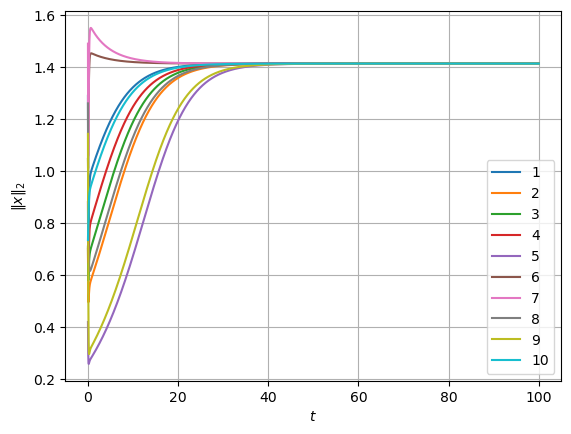

In [7]:
num_traj_plot = 10                                                              # set the number of trajectories to plot
t = linspace(0, t_final, num_samples)                                           # generate the time vector
fig, ax = subplots()                                                            # generate the figure and axis
for i in range(num_traj_plot):                                                  # loop over the trajectories
    ax.plot(t, norms[i], label=f'{i + 1}')                                      # plot the norms
ax.set_xlabel('$t$')                                                            # set the x-axis label
ax.set_ylabel('$\\|x\\|_2$')                                                    # set the y-axis label
ax.legend()                                                                     # add the legend
ax.grid()                                                                       # add the grid
show()                                                                          # show the plot

### Plot Trajectories with the Slow Manifold

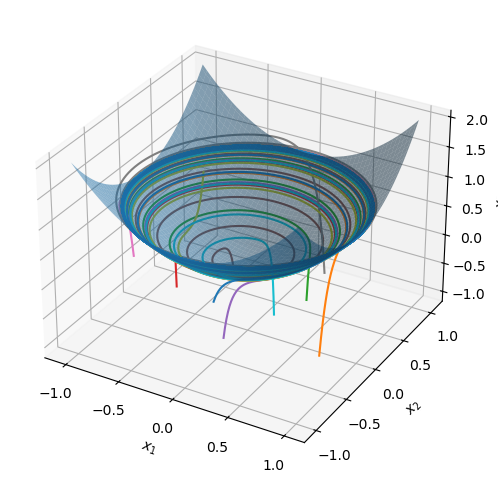

In [9]:
surface_res = 100                                                               # set the resolution of the surface plot
fig = figure(figsize=(6, 6))                                                    # generate the figure
ax = fig.add_subplot(111, projection='3d')                                      # generate the axis
X1, X2 = meshgrid(linspace(-1, 1, 100), linspace(-1, 1, 100), indexing='ij')    # generate the meshgrid
X = stack((X1, X2), dim=-1)                                                     # stack the meshgrid
X3 = first_order_sys.taylor_approx_slow_manifold(X)                             # compute the third component of slow manifold
ax.plot_surface(X1, X2, X3, alpha=0.5)                                          # plot the slow manifold
ax.set_xlabel('$x_1$')                                                          # set the x-axis label
ax.set_ylabel('$x_2$')                                                          # set the y-axis label
ax.set_zlabel('$x_3$')                                                          # set the z-axis label
for traj in trajs:                                                              # loop over the trajectories
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2])                                 # plot the trajectory
show()                                                                          # show the plot